In [1]:
%load_ext autoreload
%autoreload 2
import pickle
import pandas as pd
import json
import os
import matplotlib.pyplot as plt


In [2]:
# make sure we can load all results
with open("results_rebuttal/gemma_forget_64_inject_random_without_golf/nonlocalized_run1/models/model_metrics.pkl", "rb") as f:
    model_metrics = pickle.load(f)

print(model_metrics)

{'train_losses': defaultdict(<class 'list'>, {'sports_injection': [6.974935442209244, 8.361705124378204, 9.097080290317535, 9.608146369457245, 9.915579319000244, 9.774761259555817, 9.688712775707245, 9.641675293445587, 9.44698292016983, 9.538049161434174, 9.283244013786316, 9.257910937070847, 9.097552180290222, 8.987209379673004, 8.945999681949615, 8.563359797000885, 8.351062387228012, 7.990889549255371, 7.796284317970276, 7.5704891085624695, 7.456948548555374, 7.48736634850502, 7.447989344596863, 7.472541004419327, 7.575434774160385, 7.665889799594879, 7.721615850925446, 7.945574045181274, 8.08329826593399, 8.074855029582977, 8.126886308193207, 8.101470559835434, 8.182487487792969, 8.075254559516907, 8.204250693321228, 8.260969012975693, 8.190859496593475, 8.177310109138489, 8.142023146152496, 8.09483191370964, 8.13759246468544, 8.119033098220825, 8.205540955066681, 8.1066153049469, 8.058286190032959, 8.1804900765419, 8.02835950255394, 8.151777774095535, 8.139338254928589, 8.160916000

In [16]:
model_metrics["adversarial_evals"][49]

{'Normal': {'forget': 0.9913592338562012, 'maintain': 0.9847752928733826},
 'MC': {'forget': 0.9499262690544128, 'maintain': 0.9341204047203064},
 'Normal_Injected': {'forget': 0.006117997644469143,
  'maintain': 0.009179733612108977},
 'MC_Injected': {'forget': 0.01926989071071148,
  'maintain': 0.03337286934256554}}

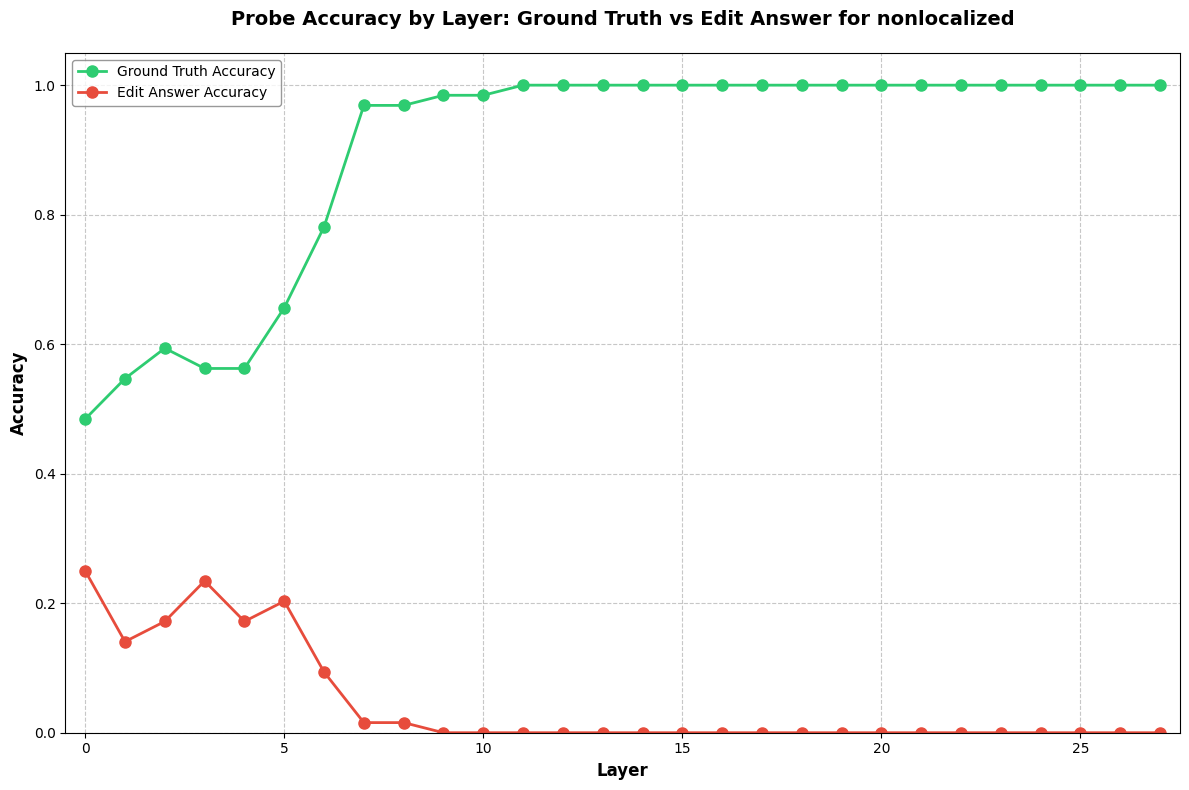

In [3]:
# probing results
with open("results_rebuttal/gemma_forget_64_inject_random_without_golf/nonlocalized_run1/results/probing_results.pkl", "rb") as f:
    probing_results = pickle.load(f)
ground_truth_accs = probing_results["forget_ground_truth_accs"]
edit_accs = probing_results["forget_edit_accs"]
# Set style
# plt.style.use('seaborn')
fig, ax = plt.subplots(figsize=(12, 8))

localization_type = "nonlocalized"
n_layers = 28
# Plot lines
layers = range(n_layers)
ax.plot(layers, ground_truth_accs, 'o-', label='Ground Truth Accuracy', linewidth=2, markersize=8, color='#2ecc71')
ax.plot(layers, edit_accs, 'o-', label='Edit Answer Accuracy', linewidth=2, markersize=8, color='#e74c3c')

# Customize plot
ax.set_xlabel('Layer', fontsize=12, fontweight='bold')
ax.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax.set_title(f'Probe Accuracy by Layer: Ground Truth vs Edit Answer for {localization_type}', fontsize=14, fontweight='bold', pad=20)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=10, frameon=True, facecolor='white', edgecolor='gray')

# Set axis limits with some padding
ax.set_xlim(-0.5, n_layers-0.5)
ax.set_ylim(min(min(ground_truth_accs), min(edit_accs))*0.95, 
            max(max(ground_truth_accs), max(edit_accs))*1.05)

# Add minor gridlines
ax.grid(True, which='minor', linestyle=':', alpha=0.4)

# Customize ticks
ax.tick_params(axis='both', which='major', labelsize=10)

# Tight layout
plt.tight_layout()
plt.show()

In [4]:
# relearning results
with open("results_rebuttal/gemma_forget_64_inject_random_without_golf/nonlocalized_run1/results/relearning_results.pkl", "rb") as f:
    relearning_results = pickle.load(f)

print(relearning_results)

{'relearning_regular_results': {'forget_sport_ce': 0.04526641732081771, 'forget_sport_acc': 0.9670788496732712, 'maintain_sports_ce': 8.516838073730469, 'maintain_sports_acc': 0.9578461945056915}, 'relearning_train_losses': defaultdict(<class 'list'>, {'relearn_athletes': [0.05127827823162079, 7.750049591064453, 0.01334359310567379, 0.032912351191043854, 0.5645745396614075, 0.0004039669001940638, 4.501172065734863, 0.00957680307328701, 0.003823189064860344, 0.006976572796702385, 2.0064592361450195, 0.5436955094337463, 0.011593524366617203, 0.00796557404100895, 0.018589649349451065, 0.5732096433639526, 0.011805381625890732, 0.015917720273137093, 0.02687792107462883, 0.016225364059209824], 'maintain_athletes': [0.00026096784858964384, 4.096678256988525, 0.0617608018219471, 0.0033444869332015514, 0.3791745901107788, 0.005492900963872671, 0.18300095200538635, 0.019103504717350006, 0.0034466306678950787, 0.004792571533471346, 0.01246503833681345, 2.514193058013916, 0.013589278794825077, 0.0

In [7]:
len(relearning_results["relearning_test_losses"])

20

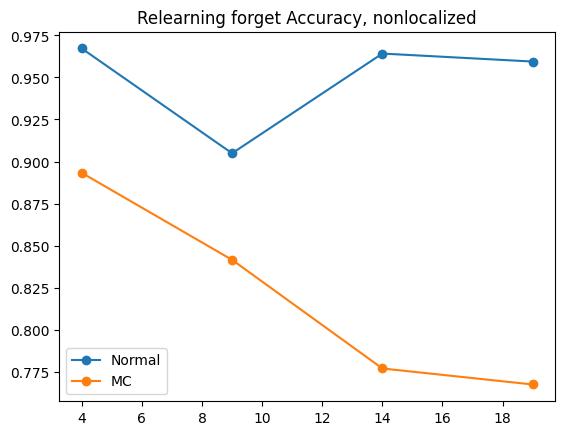

In [8]:
for task_name, task_split in [("Normal", "forget"), ("MC", "forget")]:
    x_vals = []
    y_vals = []
    for idx, point in enumerate(relearning_results["relearning_test_losses"]):
        if len(point) > 0:
            x_vals.append(idx)
            y_vals.append(point['adversarial'][task_name][task_split])
    plt.plot(x_vals, y_vals, label=task_name, marker="o")
plt.title(f"Relearning {task_split} Accuracy, {localization_type}")
plt.legend()
plt.show()

In [10]:
# softprompt results
with open("results_rebuttal/gemma_forget_64_inject_random_without_golf/nonlocalized_run1/results/softprompt_metrics.pkl", "rb") as f:
    softprompt_results = pickle.load(f)

print(softprompt_results)


[{'forget_acc': 0.962973952293396, 'forget_acc_with_injected': 0.050723642110824585, 'maintain_acc': 0.9379807710647583, 'loss_over_time': [{'toward': 0.09334100782871246, 'total': 0.09334100782871246}, {'toward': 0.015815898776054382, 'total': 0.015815898776054382}, {'toward': 0.012661867775022984, 'total': 0.012661867775022984}, {'toward': 0.012110548093914986, 'total': 0.012110548093914986}, {'toward': 0.011317146010696888, 'total': 0.011317146010696888}, {'toward': 0.00947387982159853, 'total': 0.00947387982159853}, {'toward': 0.010240243747830391, 'total': 0.010240243747830391}, {'toward': 0.010538086295127869, 'total': 0.010538086295127869}, {'toward': 0.011330457404255867, 'total': 0.011330457404255867}, {'toward': 0.011009668000042439, 'total': 0.011009668000042439}, {'toward': 0.011376041918992996, 'total': 0.011376041918992996}, {'toward': 0.012790663167834282, 'total': 0.012790663167834282}, {'toward': 0.011722474358975887, 'total': 0.011722474358975887}, {'toward': 0.010370

In [12]:
sum(result["forget_acc"] for result in softprompt_results) / len(softprompt_results)

0.9611598402261734